In [1]:
!pip install tensorflow


In [2]:
!pip install keras

In [16]:
# load data and splot data
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

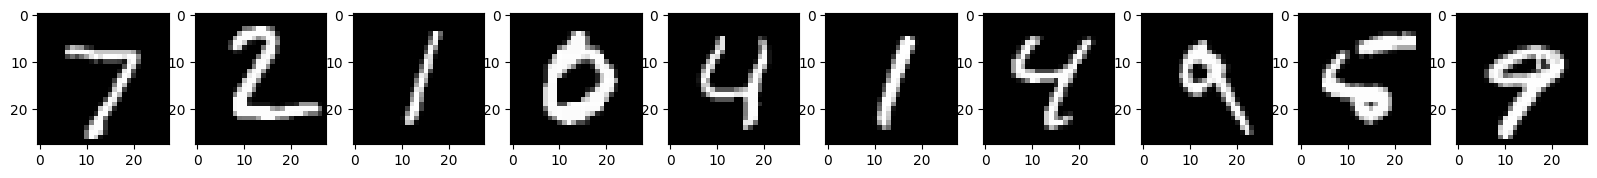

In [17]:
import matplotlib.pyplot as plt

# Number of images to display
n = 10  # You can adjust this value

# Create a figure to display the images
plt.figure(figsize=(20, 6))  # Adjust size to accommodate more rows

# Loop through the first 'n' images (adjust this range if needed)
for i in range(n):  # This will only fill the first row with 'n' images
    # Create a subplot within the figure
    pic = plt.subplot(3, n, i + 1)  # 3 rows, 'n' columns

    # Display the original image
    plt.imshow(x_test[i].reshape(28, 28))

    # Set colormap to grayscale
    plt.gray()

    # Hide x-axis and y-axis labels and ticks
    pic.get_xaxis().set_visible(False)
    pic.get_yaxis().set_visible(False)

# Show the figure with the images
plt.show()

# Close the figure (optional)
plt.close()


In [18]:
print('Privouse X_train shape: {}\n Previous Y_train shape: {}'.format(X_train.shape,Y_train.shape))


X_train = X_train.reshape(60000,784)

X_test = X_test.reshape(10000,784)

X_train = X_train.astype('float32')

X_test = X_test.astype('float32')

X_train /= 255

X_test /= 255

classes = 10

Y_train = to_categorical(Y_train,classes)

Y_test = to_categorical(Y_test,classes)

print('New X_train shape: {}\n New Y_train shape: {}'.format(X_train.shape,Y_train.shape))

Privouse X_train shape: (60000, 28, 28)
 Previous Y_train shape: (60000,)
New X_train shape: (60000, 784)
 New Y_train shape: (60000, 10)


# Hyper Parameters

In [19]:
input_size = 784
batch_size = 200
hidden1 = 400
hidden2 = 200
classes = 10
epochs = 5

# Building the FCN Model

In [20]:
model = Sequential()

model.add(Dense(20,input_dim = input_size,activation = 'relu'))

#output = relu (dot(w,input + bias))

model.add(Dense(10, activation = 'relu'))

model.add(Dense(classes, activation= 'softmax'))

# compilation
model.compile(loss = 'categorical_crossentropy' , metrics = ['accuracy'], optimizer = 'sgd')

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 20)                  │          15,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,020 (62.58 KB)

 Trainable params: 16,020 (62.58 KB)

 Non-trainable params: 0 (0.00 B)

# Training the Model

In [22]:
# importing the necessary libraries
from time import time

#record the current time to measure training time
curr_time = time()

#fit the model on the training data
model.fit(X_train,Y_train,batch_size = batch_size , epochs = 5 , verbose = 1)

training_time = time()

# calculate and print the time taken for model training
print('Model training took {} secs'.format(training_time - curr_time))

Epoch 1/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2071 - loss: 2.1959
Epoch 2/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5240 - loss: 1.5249
Epoch 3/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6694 - loss: 1.0145
Epoch 4/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7611 - loss: 0.7952
Epoch 5/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8073 - loss: 0.6653
Model training took 6.595962285995483 secs


# Accuracy of the model


Test Accuracy: 0.7615
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


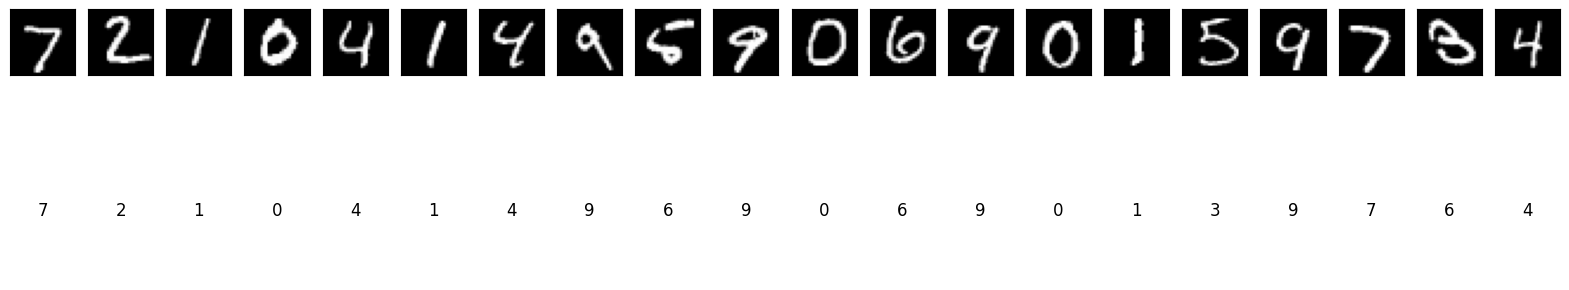

In [25]:
# import the necessary librairies
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

#predict probabilities for the test set using the trained model
y_pred_probs = model.predict(X_test,verbose = 0)

y_pred = np.where(y_pred_probs > 0.5,1,0)

#calculate and print hte test accuracy using predicted and true labels
test_accuracy = accuracy_score(y_pred,Y_test)
print('\nTest Accuracy: {}'.format(test_accuracy))

#define a mask for selecting a range of indices (20 to 49)
mask = range(20,50)

#select the first 20 samples from the test set for visualization
X_valid = X_test[0:20]

actual_labels = Y_test[0:20]

#predict probabilities for the selected validation samples
y_pred_probs_valid = model.predict(X_valid)

y_pred_valid = np.where(y_pred_probs_valid > 0.5,1,0)

#set up the figure to display the images

n = len(X_valid)

plt.figure(figsize = (20,4))

for value in range(n):
    #display the original
    ax = plt.subplot(2,n,value+1)
    plt.imshow(X_valid[value].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #display the predicted digit
    predicted_digit = np.argmax(y_pred_probs_valid[value])
    ax = plt.subplot(2,n,value+1+n)
    plt.text(0.5, 0.5, str(predicted_digit), fontsize=12, ha='center', va='center')
    # plt.text(0.5,0,5,str(predicted_digit), fontsize = 12 ,ha = 'center', va = 'center')
    plt.axis('off')

#show the ploted images
plt.show()

plt.close()
